In [47]:
import requests
import base64
from requests import post , get
import json
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from config import Client_ID,Client_Secret
import pandas as pd

In [48]:
#Spotify API isteklerini yetkilendirmek için kullanılan kimlik bilgileri
def get_token():
    auth_string = f"{Client_ID}:{Client_Secret}"
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes).decode("utf-8"))

    url = 'https://accounts.spotify.com/api/token'
    headers = {
        'Authorization': 'Basic ' + auth_base64
    }
    #token alma
    data = {'grant_type': 'client_credentials'}
    response = requests.post(url, headers=headers, data=data)
    json_result = response.json()

    if response.status_code == 200:
        token = json_result['access_token']
        print('Access Token: alındı'+ " "+token)
        return token
    else:
        print('Error:', response.status_code)
        print('Response:', json_result)
        return None

In [49]:
#authorization
def get_auth(token):
     return{ 'Authorization': 'Bearer ' + token}
#Erişim token'ını almak için get_token fonksiyonunu kullanılır.
token=get_token()

Access Token: alındı BQD1TI_lhPZIflqQzH_doQ91oM_JGqOXBxSDgjktsSnzIMWOSWWPsZlB2wNbWiaKCKeNOCojrhGj88hKazsLvbCcJgPb0Sf7bnlhtheRpYZVHr8vfIM


In [50]:
def get_user_playlists(token, user_id):
    # Kullanıcıya ait çalma listesi getiren fonksiyon
    url = f"https://api.spotify.com/v1/users/{user_id}/playlists"
    headers=get_auth(token)

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        json_response = response.json()
        playlist_dt = response.json()
        return playlist_dt.get('items', [])
    else:
        print('Error:', response.status_code)
        print('Response:', response.json())
        return None

user_id='31rmq7qts5n52ox2si25ead5iqaq'
playlist_dt=get_user_playlists(token,user_id)

# Tüm çalma listelerini depolamak için 
all_playlists = {'Playlist_owner_id':[], 'Playlist_name':[], 'Playlist_id':[], 'Number_of_songs':[],'Playlist_uri':[]}

# #Çalma listesi varsa
# if response.status_code == 200:
#     for playlist in json_result['items']:
#         print('Playlist ID:', playlist['id'])
#         print('Playlist Name:', playlist['name'])
#         print('Playlist URI:', playlist['uri'])
#         print('Playlist Owner ID:', playlist['owner']['id'])
#         print('-----------------------------')
# else:
#     print('Error:', response.status_code)
#     print('Response:', json_result)

if playlist_dt:
    # Her çalma listesi için gerekli bilgileri çıkart
    for playlist in playlist_dt:
        all_playlists['Playlist_id'].append(playlist['id'])
        all_playlists['Playlist_name'].append(playlist['name'])
        all_playlists['Number_of_songs'].append(playlist['tracks']['total'])
        all_playlists['Playlist_uri'].append(playlist['uri'])
        all_playlists['Playlist_owner_id'].append(playlist['owner']['id'])

# Elde edilen bilgileri DataFrame'e dönüştürma
all_playlists_df = pd.DataFrame(all_playlists)

all_playlists_df


,Playlist_owner_id,Playlist_name,Playlist_id,Number_of_songs,Playlist_uri
0,31rmq7qts5n52ox2si25ead5iqaq,2. Karışık,2gEpmDLiL0RiG86dtYd7Cc,44,spotify:playlist:2gEpmDLiL0RiG86dtYd7Cc
1,31rmq7qts5n52ox2si25ead5iqaq,1. Çalma Listem,7lGk615a7j3e1NqStHea9r,29,spotify:playlist:7lGk615a7j3e1NqStHea9r


In [51]:
def get_playlist_artists(token,playlist_id):
    # Çalma listesindeki parçaları alma
    url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = get_auth(token)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        tracks = response.json()
        return tracks.get('items', [])

    else:
        print('Error:', response.status_code)
        print('Response:', response.json())
        return None
    

#Çalma listesi id alma
for playlist_id in all_playlists_df['Playlist_id']:
 print(playlist_id)



2gEpmDLiL0RiG86dtYd7Cc
7lGk615a7j3e1NqStHea9r


In [52]:
#Çalma listesindeki her veriyi depolamak için
playlists_item={'Name':[],'id':[] ,'Artist':[], 'Duration':[], 'Release_date':[], 'Popularity':[]}

#Playlistesindeki verileri alma
for playlist_id in all_playlists_df['Playlist_id']:
    play_tracks=get_playlist_artists(token,playlist_id)


    if play_tracks:
            for track in play_tracks:
             playlists_item['Name'].append(track['track']['name'])
             playlists_item['Artist'].append(track['track']['artists'][0]['name'])
             playlists_item['Duration'].append(track['track']['duration_ms'])
             playlists_item['Release_date'].append(track['added_at'])
             playlists_item['id'].append(track['track']['id'])
             playlists_item['Popularity'].append(track['track']['popularity'])

#DataFrame çevğrme
playlists_item_df =pd.DataFrame(playlists_item)
playlists_item_df

            

,Name,id,Artist,Duration,Release_date,Popularity
0,Seninle Ben,3W6rKNbovssiDHqIcXBjlk,Gökhan Türkmen,279005,2023-12-27T12:23:02Z,53
1,Seninle Ben,4mlnEk7KKXiUweyqwwTEjf,Ayna,333760,2023-12-27T12:23:05Z,18
2,Aşkın Kederi,4tA6mbvO5vzFg9S87s3fcC,Manuş Baba,229960,2023-12-27T12:23:13Z,46
3,Susma,5Q4OWZdBISVfWjbtRpIeiB,Aşkın Nur Yengi,324826,2023-12-27T12:23:14Z,41
4,Pamuk,5e84hFQxrRDXsZwScxNIak,Kenan Doğulu,239133,2023-12-27T12:23:16Z,39
...,...,...,...,...,...,...
68,Sadece,5PBCWGudD3lw0Qhk7jLMUo,Kalben,175996,2023-12-27T12:24:28Z,66
69,Kısa Mesafe,7AeN1Miu6Io3ewNUdBzhyy,Rafat Hasanlı,147497,2023-12-27T12:24:38Z,68
70,Giderdi Hoşuma,7LXZEyI1ke06UnmuwG4P8d,Yaşlı Amca,220530,2023-12-27T12:24:41Z,64
71,Galiba - Orijinal Rap Versiyon,6uuQZFYzeUf1NR5tucdjj5,Sagopa Kajmer,300506,2023-12-27T12:24:41Z,64


#### Şarkı Ses Özellikleri alma

In [53]:
#Şarkılardaki ses özelliklerini alma
def get_audio_features(token,song_id):
 
    url = 'https://api.spotify.com/v1/audio-features'
    headers = get_auth(token)
    params = {'ids': song_id}

    response = requests.get(url, headers=headers,params=params)

    if response.status_code == 200:
        tracks = response.json()
        return tracks['audio_features']
    else:
        print('Error:', response.status_code)
        print('Response:', response.json())
        return None
    

In [54]:
#ses özelliklerini depolamak için sözlük oluştutma
audio_features={'Danceability':[], 'Energy':[], 'Instrumentalness':[], 'Loudness':[], 'Liveness':[], 'Speechiness':[],'Tempo':[],'Valence':[],'Time_signature':[],'Acousticness':[],'mode':[],'id':[]}

In [55]:
#her şarkı için ses özelliklerini  alma
for song_id  in playlists_item_df['id']:
    song_feat=get_audio_features(token,song_id)


    if song_feat:
            for features in song_feat:
             audio_features['Danceability'].append(features['danceability'])
             audio_features['Energy'].append(features['energy'])
             audio_features['Instrumentalness'].append(features['instrumentalness'])
             audio_features['Loudness'].append(features['loudness'])
             audio_features['Liveness'].append(features['liveness'])
             audio_features['Speechiness'].append(features['speechiness'])
             audio_features['Tempo'].append(features['tempo'])
             audio_features['Valence'].append(features['valence'])
             audio_features['Time_signature'].append(features['time_signature'])
             audio_features['Acousticness'].append(features['acousticness'])
             audio_features['mode'].append(features['mode'])
             audio_features['id'].append(features['id'])
            
#DataFrame çevirme
audio_features_df =pd.DataFrame(audio_features)
audio_features_df.head()

,Danceability,Energy,Instrumentalness,Loudness,Liveness,Speechiness,Tempo,Valence,Time_signature,Acousticness,mode,id
0,0.373,0.480,0.000035,-8.057,0.1300,0.0283,61.372,0.440,4,0.134,0,3W6rKNbovssiDHqIcXBjlk
1,0.309,0.666,0.000015,-6.698,0.3140,0.0385,180.216,0.176,3,0.231,0,4mlnEk7KKXiUweyqwwTEjf
2,0.560,0.414,0.007240,-7.625,0.0811,0.0254,81.026,0.248,4,0.878,0,4tA6mbvO5vzFg9S87s3fcC
3,0.591,0.291,0.000000,-16.147,0.1570,0.0360,75.674,0.137,4,0.238,0,5Q4OWZdBISVfWjbtRpIeiB
4,0.483,0.328,0.000000,-10.986,0.1410,0.0581,69.204,0.321,4,0.499,0,5e84hFQxrRDXsZwScxNIak


#### ID'lere göre şarkı bilgilerini birleştime

In [56]:
df = pd.merge(playlists_item_df, audio_features_df, on='id', how='inner')
df.head()

,Name,id,Artist,Duration,Release_date,Popularity,Danceability,Energy,Instrumentalness,Loudness,Liveness,Speechiness,Tempo,Valence,Time_signature,Acousticness,mode
0,Seninle Ben,3W6rKNbovssiDHqIcXBjlk,Gökhan Türkmen,279005,2023-12-27T12:23:02Z,53,0.373,0.480,0.000035,-8.057,0.1300,0.0283,61.372,0.440,4,0.134,0
1,Seninle Ben,4mlnEk7KKXiUweyqwwTEjf,Ayna,333760,2023-12-27T12:23:05Z,18,0.309,0.666,0.000015,-6.698,0.3140,0.0385,180.216,0.176,3,0.231,0
2,Aşkın Kederi,4tA6mbvO5vzFg9S87s3fcC,Manuş Baba,229960,2023-12-27T12:23:13Z,46,0.560,0.414,0.007240,-7.625,0.0811,0.0254,81.026,0.248,4,0.878,0
3,Susma,5Q4OWZdBISVfWjbtRpIeiB,Aşkın Nur Yengi,324826,2023-12-27T12:23:14Z,41,0.591,0.291,0.000000,-16.147,0.1570,0.0360,75.674,0.137,4,0.238,0
4,Pamuk,5e84hFQxrRDXsZwScxNIak,Kenan Doğulu,239133,2023-12-27T12:23:16Z,39,0.483,0.328,0.000000,-10.986,0.1410,0.0581,69.204,0.321,4,0.499,0


In [57]:
# Birleştirilmiş DataFrame'i CSV dosyasına kaydetme
df.to_csv('spotify.csv', index=False)

## Şarkı verilerinden görsel elde etme

In [58]:
spotify.head()

,Name,id,Artist,Duration,Release_date,Popularity
0,Seninle Ben,3W6rKNbovssiDHqIcXBjlk,Gökhan Türkmen,279005,2023-12-27T12:23:02Z,53
1,Seninle Ben,4mlnEk7KKXiUweyqwwTEjf,Ayna,333760,2023-12-27T12:23:05Z,18
2,Aşkın Kederi,4tA6mbvO5vzFg9S87s3fcC,Manuş Baba,229960,2023-12-27T12:23:13Z,46
3,Susma,5Q4OWZdBISVfWjbtRpIeiB,Aşkın Nur Yengi,324826,2023-12-27T12:23:14Z,41
4,Pamuk,5e84hFQxrRDXsZwScxNIak,Kenan Doğulu,239133,2023-12-27T12:23:16Z,39


##### Çalma listesindeki en popüler şarkılar

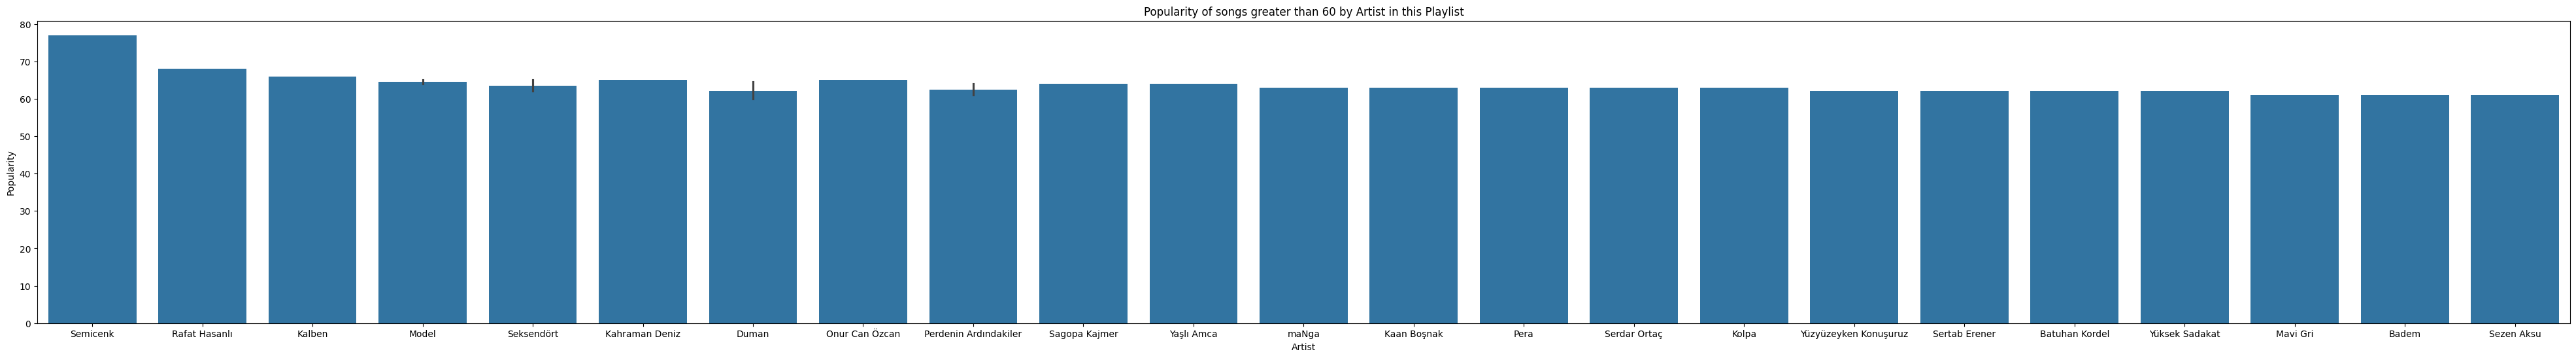

In [59]:
#Bu Çalma Listesindeki Sanatçıya göre 60'tan büyük şarkıların popülaritesi
high_po = spotify.loc[ spotify ['Popularity' ] >= 60 ].sort_values( by =[ 'Popularity' ] ,ascending = False) 

plt.figure(figsize=(50, 6))
sns.barplot(x='Artist', y='Popularity', data=high_po)
plt.title('Popularity of songs greater than 60 by Artist in this Playlist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()

<Axes: >

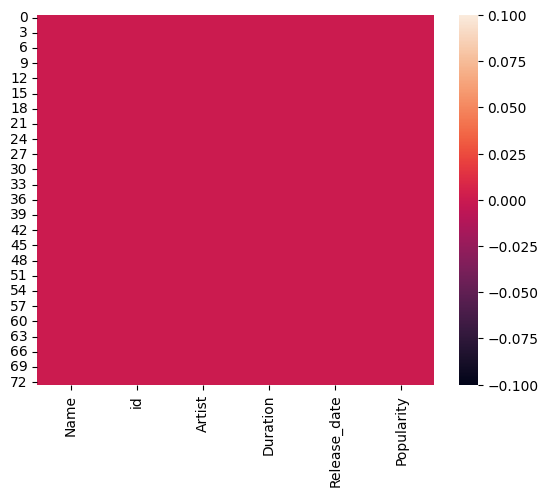

In [60]:
sns.heatmap(spotify.isna())
#eksik değer olup olmadığını gösteren ısı haritası

#### Birleştirilmiş şarkı özellikleirnden görselleştierme

In [61]:
fig=px.scatter(df,x=df['Tempo'],y=df['Danceability'],color=df['Popularity'],size=df['Popularity'],
               title='Dans edilebilirliğe karşı tempo kullanarak popüler şarkıların dağılım grafiği')
fig.show()

#### Çalma listesindeki popüler şarkıların dağılım grafiklerini belirlemek için Tempo sütununu Dans Edilebilirlik sütununa karşı kullandım.

